# Project: Wrangling and Analyze Data

Import all necessary modules and libraries for the Data Gathering, Assessing, Cleaning, Saving and Analysing.

In [1]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#requests module
import requests

#beautiful soup module
from bs4 import BeautifulSoup as bs

#os module
import os

#json module
import json

#tweepy module
import tweepy

C:\anaconda\envs\kolaenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# load the csv file into a pandas dataframe
archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Make a directory to save the image_predictions file if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
#Get the image_predictions  file from the url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
#Access the Content of the url and Write to a File

with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [6]:
#get the list of files in the specified directory

os.listdir(folder_name)

['image-predictions.tsv']

In [7]:
#load the tsv file into a dataframe

path = 'C:/Users/rnt 2/Documents/Python Projects/Deux/image_predictions/image-predictions.tsv'
predictions = pd.read_csv(path, sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

 I got the json data directly due to the fact that my Twitter developer account was not approved. Below is a commented version of the algorithm code used to query the dataset.

In [8]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    # for tweet_id in tweet_ids:
        # count += 1
        # print(str(count) + ": " + str(tweet_id))
        # try:
            # tweet = api.get_status(tweet_id, tweet_mode='extended')
            # print("Success")
            # json.dump(tweet._json, outfile)
            # outfile.write('\n')
        # except tweepy.TweepError as e:
            # print("Fail")
            # fails_dict[tweet_id] = e
            # pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [9]:
#read tweet_json.txt into a DataFrame
with open('tweet_json.txt', 'r') as file:
    lines = file.readlines()
data = [ ]
for line in lines:
    data.append(json.loads(line))

additional = pd.DataFrame(data)

In [10]:
# slice dataframe to select only desired columns of interest
additional = additional[['id', 'retweet_count', 'favorite_count', 'created_at']]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Visual Assessments

In [11]:
# Assessing the Twitter archive data
# Return first 5 rows
archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
# Assessing the Image Predictions data
# Return first 5 rows
predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
# Assessing the API additional data
# Return first 5 rows
additional.head(5)

,id,retweet_count,favorite_count,created_at
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017


#### Progmatical Assessment

In [14]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


The highest probability for the first guess is equal to 1, which is expected.

In [17]:
# print information of dataframe
additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   created_at      2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [18]:
#Check for consistency in rating_denominator
archive['rating_denominator'].value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [19]:
# Checking for duplicated columns by creating a list of every column in every dataset
all_columns = pd.Series(list(archive) + list(predictions) + list(additional))

# all_columns
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

The only duplicated column is tweet_id.

### Quality issues
#### *twitter-archive-enhanced.csv*

1.Not all tweets are original ratings. Some are retweets and replies

2.Timestamp column is not in datatime format

3.Tweet_id fields in the three datasets are stored as integers but should be strings

4.Source column has unnecesary HTML code

5.Expanded_urls contains more than one urls

6.Some Dog names are wrong and unavailable in text column

7.Some rating_numerators are wrong

8.'id' variable name in additional dataset should be changed to 'tweet_id' 

9.Merge predictions and additional data with twitter_archive_enhanced to create master data


### Tidiness issues
#### *twitter-archive-enhanced.csv*
1.The Dog stages is spread between four columns instead of one.

#### *image predictions.tsv*
2.Predictions are spread in three columns

3.Confidence intervals are spread in three columns.

4.Dog tests are spread in three columns.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [20]:
# Make copies of original pieces of data
archive_clean = archive.copy()
predictions_clean = predictions.copy()
additional_clean = additional.copy()

### Issue #1: Not all tweets are original ratings. Some are retweets and replies

#### Define

Remove all observations in the **archive_clean** dataset that have values in the columns **in_reply_to_status_id** or **retweeted_status_id**.

Then remove those two columns plus **retweeted_status_user_id**, **retweeted_status_timestamp** and **in_reply_to_user_id** since they are not useful in the analysis.

#### Code

In [21]:
#Filter out observations that are not original ratings
archive_clean = archive_clean[(archive_clean.in_reply_to_status_id.isna() == True) & 
                              (archive_clean.retweeted_status_id.isna() == True)]

In [22]:
# drop the unnessary columns that are no more useful for the analysis
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                              'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Test

In [23]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #2: Timestamp column is not in datatime format

#### Define

Change timestamp datatype in archive dataframe from object to datatime type

#### Code

In [24]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [25]:
archive_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

### Issue #3: Tweet_id fields in the three datasets are stored as integers but should be strings

#### Define

Change the integer datatypes for the tweet_id variable from **int** to **object (string)** in the three datasets

#### Code

In [26]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
predictions_clean['tweet_id'] = predictions_clean['tweet_id'].astype(str)
additional_clean['id'] = additional_clean['id'].astype(str)

#### Test

In [27]:
print(archive_clean.tweet_id.dtype)
print(predictions_clean.tweet_id.dtype)
print(additional_clean.id.dtype)

object
object
object


### Issue #4: The Dog stages is spread between four columns instead of one.

#### Define

There are variables in the  twitter archive dataset. Therefore will melt the variable **doggo**, **floofer**, **pupper**, **puppo** into a new variable called **dog_stage**. Before melting, will create a new variable to identify those dogs with dog stage **'unknown'**

#### Code

In [28]:
# Create an extra variable to tag those dogs without a recognized stage (unknown)
# This will help cleaning the dataset afterwards
def u(row):
    if row ['doggo'] == 'None' and row ['floofer'] == 'None' and row ['pupper'] == 'None' and row ['puppo'] == 'None':
        val = 'unknown'
    else:
        val ='None'
    return val

archive_clean['unknown'] = archive_clean.apply(u, axis=1)

In [29]:
# melt the 5 different dog stages into a new column calle 'dog_stage'
archive_clean = pd.melt(archive_clean, id_vars =['tweet_id','timestamp','source','text','expanded_urls',
                                                 'name', 'rating_numerator','rating_denominator'],
                     value_vars = ['doggo', 'floofer', 'pupper', 'puppo', 'unknown'],
                     var_name = 'dog_stage', 
                    value_name = 'value')

In [30]:
# clean the duplicated rows created and drop the 'value' variable
archive_clean = archive_clean[archive_clean['value']!= 'None']
archive_clean = archive_clean.drop('value', axis=1)

#### Test

In [31]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 9 to 10484
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2108 non-null   object             
 1   timestamp           2108 non-null   datetime64[ns, UTC]
 2   source              2108 non-null   object             
 3   text                2108 non-null   object             
 4   expanded_urls       2105 non-null   object             
 5   name                2108 non-null   object             
 6   rating_numerator    2108 non-null   int64              
 7   rating_denominator  2108 non-null   int64              
 8   dog_stage           2108 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 164.7+ KB


In [32]:
archive_clean.dog_stage.unique()

array(['doggo', 'floofer', 'pupper', 'puppo', 'unknown'], dtype=object)

Notably, we now have 2,108 observations compared to the previous 2,097 observations. This is because some tweets are about more than one dog and also included more than on dog stage.

### Issue #5: Predictions are spread in three columns

#### Define

The three different predictions, the three confidence and the three test whether the prediction is a dog or not, is to be melted into four columns: **prediction_number**, **prediction**, **confidence** and **dog** for data tidyness.

#### Code

In [33]:
# This is the melting process for the three categories of data: prediction, confidence and dog test. 

# create 'prediction_number' and 'prediction' columns
predictions_clean = pd.melt(predictions_clean, id_vars = ['tweet_id', 'jpg_url', 'img_num', 'p1_conf', 'p1_dog',
       'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog'],
               var_name = 'prediction_number',
               value_name = 'prediction')

# create 'confidence' column
predictions_clean = pd.melt(predictions_clean, id_vars = ['tweet_id', 'jpg_url', 'img_num', 'p1_dog',
       'p2_dog', 'p3_dog', 'prediction_number', 'prediction'],
               var_name = 'conf',
               value_name = 'confidence')

# remove newly created duplicated rows
predictions_clean = predictions_clean[predictions_clean['prediction_number'] == predictions_clean['conf'].str[:2]]
# remove unnecesary column
predictions_clean = predictions_clean.drop('conf', axis=1)

# create 'dog' column
predictions_clean = pd.melt(predictions_clean, id_vars = ['tweet_id', 'jpg_url', 'img_num','prediction_number', 'prediction', 'confidence'],
               var_name = 'conf_2',
               value_name = 'dog')

# remove newly created duplicated rows
predictions_clean = predictions_clean[predictions_clean['prediction_number'] == predictions_clean['conf_2'].str[:2]]

# remove unnecesary column
predictions_clean = predictions_clean.drop('conf_2', axis=1)
# remove the prefix 'p' from prediction number to get only 1,2,3
predictions_clean['prediction_number'] = predictions_clean['prediction_number'].str[1]


#### Test

In [34]:
#sort the dataframe by tweet_id and prediction number to show that the melt process worked
predictions_clean.sort_values(by = ['tweet_id', 'prediction_number']).head(6)

,tweet_id,jpg_url,img_num,prediction_number,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
8300,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
16600,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
8301,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
16601,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,Rhodesian_ridgeback,0.072010,True


### Issue #6: Source column has unnecesary HTML code

#### Define

Remove the HTML tag from the source column in the feed dataframe, leaving only the clear value of the source.
Use Beautiful Soup because the text is the contents of an HTML tag.

#### Code

In [35]:
# Iterate through each row and extract the source's text

source_new = []
for line, row in archive_clean.iterrows():
    soup = bs(row.source)
    x = soup.find('a').contents[0]
    source_new.append(x)
    
archive_clean['source'] = source_new

#### Test

In [36]:
#check for the unique observations in the cleaned 'source' variable
archive_clean.source.unique()

array(['Twitter for iPhone', 'Vine - Make a Scene', 'TweetDeck',
       'Twitter Web Client'], dtype=object)

### Issue #7: Expanded_urls contains more than one urls

#### Define

Split each value(s) and keep only the first URL in the expanded_urls. Then, rename column to expanded_url

#### Code

In [37]:
#split the values of the column and get the first value
archive_clean['expanded_urls'] = archive_clean['expanded_urls'].str.split(',', expand=True)[0]

#Rename the column to expanded_url
archive_clean = archive_clean.rename(index=str, columns={"expanded_urls": "expanded_url"})

#### Test

In [38]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2108 entries, 9 to 10484
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2108 non-null   object             
 1   timestamp           2108 non-null   datetime64[ns, UTC]
 2   source              2108 non-null   object             
 3   text                2108 non-null   object             
 4   expanded_url        2105 non-null   object             
 5   name                2108 non-null   object             
 6   rating_numerator    2108 non-null   int64              
 7   rating_denominator  2108 non-null   int64              
 8   dog_stage           2108 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 164.7+ KB


In [39]:
archive_clean.expanded_url.str.contains(',').sum()

0

In [40]:
archive_clean.dog_stage.value_counts()

unknown    1761
pupper      230
doggo        83
puppo        24
floofer      10
Name: dog_stage, dtype: int64

### Issue #8: Some Dog names are wrong and unavailable in text column

#### Define

Check for wrong dog names (mostly in lower case) and replace with 'Unknown'

#### Code

In [41]:
#check for wrong dog names
archive_clean.name[archive_clean.name.str.islower()].unique()

array(['one', 'his', 'just', 'a', 'actually', 'mad', 'all', 'the', 'such',
       'quite', 'not', 'incredibly', 'very', 'my', 'an', 'getting',
       'this', 'unacceptable', 'old', 'infuriating', 'by', 'officially',
       'life', 'light', 'space'], dtype=object)

In [42]:
#replace the incorrect dog names with 'unknown'
wrong = archive_clean.name[archive_clean.name.str.islower()].unique()
archive_clean = archive_clean.replace(wrong,'None')

#### Test

In [43]:
archive_clean.name[archive_clean.name.str.islower()].unique()

array([], dtype=object)

In [44]:
archive_clean.name.unique()

array(['Cassie', 'Yogi', 'None', 'Napolean', 'Scout', 'Barney', 'Mimosa',
       'Meera', 'Rhino', 'Smiley', 'Miguel', 'Emanuel', 'Pete', 'Astrid',
       'Doobert', 'Loki', 'Cupid', 'Pilot', 'Duchess', 'Sundance',
       'Sunny', 'Bo', 'Dido', 'Chubbs', 'Rocky', 'Bones', 'Sobe', 'Rizzo',
       'Pinot', 'Deacon', 'Sampson', 'Combo', 'Anakin', 'Finley',
       'Gerald', 'Wishes', 'Maggie', 'Piper', 'Boomer', 'Divine', 'Lenox',
       'Kellogg', 'Kyle', 'Grizzwald', 'Doc', 'Blu', 'Moose', 'Petrick',
       'Roscoe', 'Gus', 'Ginger', 'Jed', 'Sierra', 'Rover', 'Jamesy',
       'Pickles', 'Clark', 'Ava', 'Gidget', 'Kona', 'Gabe', 'Cooper',
       'Craig', 'Ollie', 'Laika', 'Ralphy', 'Sophie', 'Huck', 'Winnie',
       'Chelsea', 'Willem', 'Louie', 'Jax', 'Lola', 'Milo', 'Malcolm',
       'Zoe', 'Finn', 'Edmund', 'Aqua', 'Baloo', 'Benji', 'Rory',
       'Buckley', 'Rooney', 'Rueben', 'Lillie', 'Ashleigh', 'Luther',
       'Oliver', 'Derek', 'Clyde', 'Smokey', 'Ozzy', 'Winston',
       'Chuck

### Issue #9: Some rating_numerators are wrong. There is indeed a decimal numerator, so have to change the datatype to float

#### Define

Change datatype and use regex to extract the correct ratings numerators again.

#### Code

In [45]:
#change the datatype to float
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype('float')

In [46]:
#Extract the rating_numerator again
archive_clean['rating_numerator'] = archive_clean['text'].str.extract('(\d+\.*\d*\/\d+)', expand=False).str.split('/').str[0]

### Test

In [47]:
#test for datatype change
print(archive_clean.rating_numerator.dtype)

object


In [48]:
#test for ratings_numerator extraction
archive_clean[archive_clean.rating_numerator == '13.5']

,tweet_id,timestamp,source,text,expanded_url,name,rating_numerator,rating_denominator,dog_stage
8429,883482846933004288,2017-07-08 00:28:19+00:00,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,Bella,13.5,10,unknown


In [49]:
# Check for unique counts
archive_clean['rating_numerator'].value_counts().count()

34

In [50]:
archive_clean['rating_numerator'].value_counts().sort_index()

0          1
1          5
10       437
11       414
11.26      1
11.27      1
12       492
121        1
13       289
13.5       1
14        38
144        1
165        1
1776       1
2          9
204        1
24         1
3         19
4         16
420        1
44         1
45         1
5         34
50         1
6         32
60         1
7         52
8         98
80         1
84         1
88         1
9        153
9.75       1
99         1
Name: rating_numerator, dtype: int64

### Issue #10: 'id' variable name in additional dataset should be changed to 'tweet_id' 

### Define

Rename 'id' variable name to 'tweet_id' for consistency with the other two datasets

### Code

In [51]:
additional_clean = additional_clean.rename(columns={'id':'tweet_id'})

### Test

In [52]:
additional_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   created_at      2354 non-null   object
dtypes: int64(2), object(2)
memory usage: 73.7+ KB


### Issue #11: Merge predictions and additional data with twitter_archive_enhanced to create master data

#### Define

Merge additional data with archive data

#### Code

In [53]:
# merge 'additional_data' and 'twitter_archive' dataframes on 'tweet_id' with Left join
twitter_archive_master = archive_clean.merge(additional_clean, how = 'left', on = 'tweet_id')

In [54]:
twitter_archive_master.head(2)

,tweet_id,timestamp,source,text,expanded_url,name,rating_numerator,rating_denominator,dog_stage,retweet_count,favorite_count,created_at
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,14,10,doggo,7711,32467,Wed Jul 26 15:59:51 +0000 2017
1,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,Yogi,12,10,doggo,3128,20771,Sun Jul 09 21:29:42 +0000 2017


In [55]:
# merge 'predictions data' and 'twitter_archive_master' dataframes on 'tweet_id' with Left join
twitter_archive_master = twitter_archive_master.merge(predictions_clean, how = 'left', on = 'tweet_id')

In [56]:
twitter_archive_master.head(5)

,tweet_id,timestamp,source,text,expanded_url,name,rating_numerator,rating_denominator,dog_stage,retweet_count,favorite_count,created_at,jpg_url,img_num,prediction_number,prediction,confidence,dog
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,14,10,doggo,7711,32467,Wed Jul 26 15:59:51 +0000 2017,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,1,Pembroke,0.511319,True
1,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,14,10,doggo,7711,32467,Wed Jul 26 15:59:51 +0000 2017,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,2,Cardigan,0.451038,True
2,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,14,10,doggo,7711,32467,Wed Jul 26 15:59:51 +0000 2017,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,3,Chihuahua,0.029248,True
3,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,Yogi,12,10,doggo,3128,20771,Sun Jul 09 21:29:42 +0000 2017,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1.0,1,German_shepherd,0.707046,True
4,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,Yogi,12,10,doggo,3128,20771,Sun Jul 09 21:29:42 +0000 2017,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1.0,2,malinois,0.199396,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
# Define a variable for the intended CSV file
master_file = 'twitter_archive_master.csv'

#Store the master dataset to the CSV file.
twitter_archive_master.to_csv(master_file, index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

# Most common dog breeds

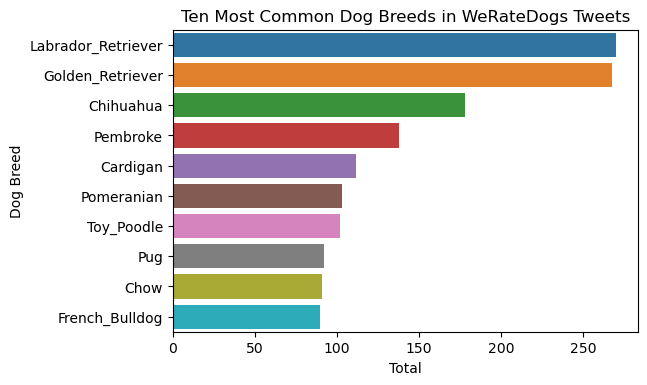

In [58]:
# Plot counts of the 10 most common dog breeds
top_breeds = (twitter_archive_master.prediction.value_counts()
              .head(10)
              .to_frame()
              .reset_index()
              .rename(columns={'index': 'prediction', 'prediction': 'total'}))
top_breeds['prediction'] = top_breeds['prediction'].str.title()
plt.figure(dpi=100);
ax = sns.barplot(x='total', y='prediction', data=top_breeds);
ax.set_title('Ten Most Common Dog Breeds in WeRateDogs Tweets');
ax.set_ylabel('Dog Breed');
ax.set_xlabel('Total');

# Most common dog ratings


In [59]:
#combine numerator and denominator as one string to get a single rating
twitter_archive_master['score_comb'] = twitter_archive_master['rating_numerator'].astype(str) + "/" + \
                                  twitter_archive_master['rating_denominator'].astype(str)

twitter_archive_master.score_comb.value_counts()

12/10       1394
10/10       1273
11/10       1200
13/10        799
9/10         450
8/10         288
7/10         153
14/10        104
5/10         100
6/10          96
3/10          57
4/10          45
2/10          27
1/10          12
144/120        3
88/80          3
11.26/10       3
80/80          3
7/11           3
420/10         3
121/110        3
44/40          3
60/50          3
45/50          3
1776/10        3
99/90          3
50/50          3
4/20           3
204/170        3
9/11           3
165/150        3
9.75/10        3
24/7           3
84/70          3
0/10           3
13.5/10        3
11.27/10       3
1/2            3
Name: score_comb, dtype: int64

# Total tweets per month

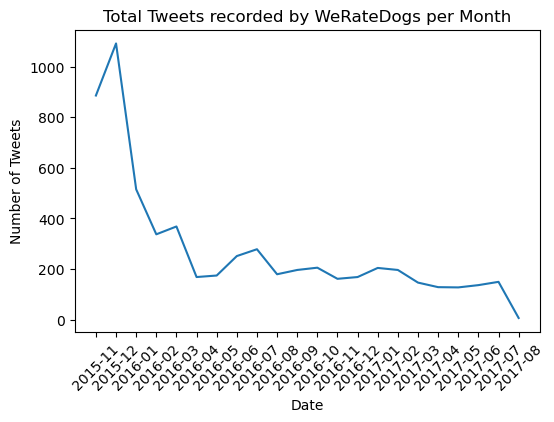

In [60]:
# Prepare tweet_archive for plotting
twitter_archive_master['year_month_date'] = twitter_archive_master['timestamp'].dt.year.astype(str) + '-' + \
                                            twitter_archive_master['timestamp'].dt.month.astype(str).str.pad(2, fillchar='0')
twitter_archive_master['is_tweet'] = np.where(twitter_archive_master.tweet_id.notnull(), 1, 0)

# Get required data from twitter_archive
twitter_archive_monthly_tweets = twitter_archive_master.groupby('year_month_date').is_tweet.sum().reset_index()

# Plot the data
plt.figure(dpi=100);
plt.xticks(rotation=45);
ax = sns.lineplot(x='year_month_date', y='is_tweet', data=twitter_archive_monthly_tweets);
ax.set_title('Total Tweets recorded by WeRateDogs per Month');
ax.set_xlabel('Date');
ax.set_ylabel('Number of Tweets');

### Insights:
1.From the plot it's clear that the Labrador Retriever and the Golden Retriever shows up the most often in tweets even compared to the rest of the most common dog breeds.

2.The most common score by far is 12/10 followed by 10/10 and 11/10. It is noteworthy to mention that in these most common scores, the numerator doesn't stray too far above the denominator.

3.The account was very active within the first two months (November 2015 and December 2015) and continued to experience a decline around 2016 afterwards.

### Visualization